# United States Hate Crime Analysis 

### The following script contains:
#### 01. Importing Data and Libraries
#### 02. Data Cleaning
#### 03. Data Prep for Regression Analysis
#### 04. Regression Analysision¶

### 01. Importing Data and Libraies


In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import os 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Create path and import data
path = r'C:\Users\Jamie&Ken\Desktop\Data Analytics Course\Advanced Analytics & Dashboard Design\10-2024 American Hate Crime'
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'hate_crimes_wrangled.csv'))

### 02. Data Cleaning

In [7]:
# Check dataframe
df.head()

,Unnamed: 0,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,BIAS_DESC
0,0,1991,AR,Arkansas,South,1,White,1,Intimidation,Anti-Black or African American
1,1,1991,AR,Arkansas,South,1,Black or African American,1,Simple Assault,Anti-White
2,2,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,Anti-Black or African American
3,3,1991,AR,Arkansas,South,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
4,4,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,Anti-White


In [8]:
df.shape

(180293, 10)

In [9]:
# Check for missing values
df.isnull().sum()

Unnamed: 0              0
DATA_YEAR               0
STATE_ABBR              0
STATE_NAME              0
REGION_NAME             0
TOTAL_OFFENDER_COUNT    0
OFFENDER_RACE           0
VICTIM_COUNT            0
OFFENSE_NAME            0
BIAS_DESC               0
dtype: int64

In [10]:
# Check for duplicates
dups = df.duplicated()

In [11]:
dups.shape

(180293,)

In [12]:
df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME',
       'BIAS_DESC'],
      dtype='object')

In [13]:
# Drop unnecessary column
df = df.drop(['Unnamed: 0'], axis = 1) #this is likely a reference column that got added since it is an excel file

In [14]:
# Confirm column was dropped
df.columns

Index(['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME',
       'BIAS_DESC'],
      dtype='object')

In [16]:
# Rename columns
newly_named = {'DATA_YEAR':'incident_year',
             'STATE_ABBR':'state_abbr',
             'STATE_NAME':'state_name',
             'REGION_NAME':'region_name',
             'TOTAL_OFFENDER_COUNT':'offender_count',
             'OFFENDER_RACE':'offender_race',
             'VICTIM_COUNT':'victim_count',
             'OFFENSE_NAME':'offense_type',
             'BIAS_DESC':'prejudice'}
df.rename(columns=newly_named,inplace=True)

In [17]:
# Check columns
df.columns

Index(['incident_year', 'state_abbr', 'state_name', 'region_name',
       'offender_count', 'offender_race', 'victim_count', 'offense_type',
       'prejudice'],
      dtype='object')

C:\Users\Jamie&Ken\AppData\Local\Temp\ipykernel_23028\3705764192.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['victim_count'],bins = 40, kde = True)


<Axes: xlabel='victim_count', ylabel='Density'>

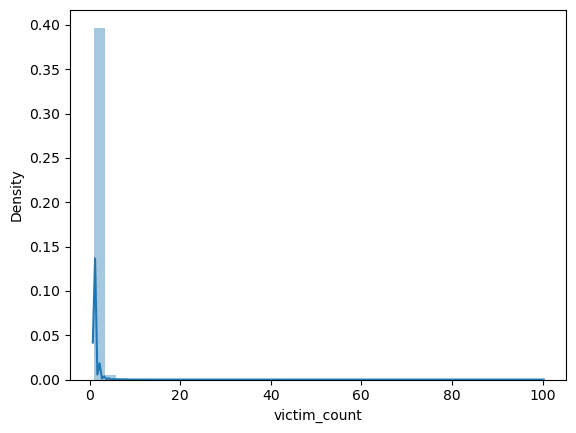

In [29]:
# Check for extreme values
sns.distplot(df['victim_count'],bins = 40, kde = True)

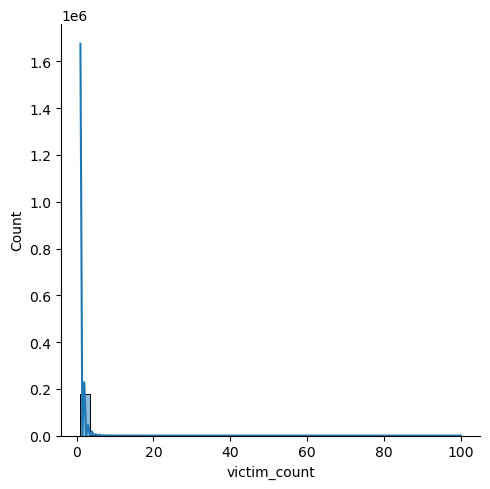

In [28]:
# Check for extreme values
sns.displot(df['victim_count'],bins = 40, kde = True) #using different code after system warning

In [30]:
# Check for mean
df['victim_count'].mean()

1.2430432684574553

In [31]:
# Check for median
df['victim_count'].median()

1.0

In [32]:
# Check for min
df['victim_count'].min()

1

In [34]:
# Check for max
df['victim_count'].max()

100

In [36]:
df.describe()

,incident_year,offender_count,victim_count
count,180293.000000,180293.000000,180293.000000
mean,2003.843067,0.993860,1.243043
std,7.682728,1.412837,1.009580
min,1991.000000,0.000000,1.000000
25%,1997.000000,0.000000,1.000000
50%,2003.000000,1.000000,1.000000
75%,2010.000000,1.000000,1.000000
max,2018.000000,99.000000,100.000000


### 03. Data Prep for Regression Analysis

##### (For the purpose of this analysis) Hypothesis: If the offender count increases, then the victim count increases. (What I would personally like to look at would instead be if victim count >1, then offender count increases)

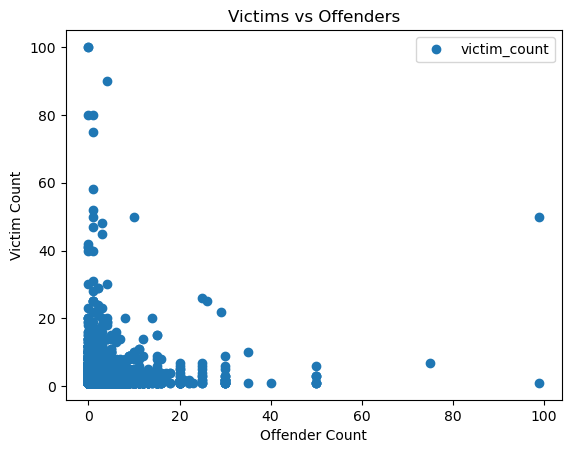

In [38]:
# Create a scatterplot using matpolotlib for another look at how the chosen variables plot against eachother. 
df.plot(x = 'offender_count', y='victim_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Victims vs Offenders')  
plt.xlabel('Offender Count')  
plt.ylabel('Victim Count')  
plt.show()

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['victim_count'].values.reshape(-1,1)
y = df['offender_count'].values.reshape(-1,1)

In [40]:
# Check reshape
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [41]:
# Check reshape
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [42]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 04. Regression Analysis

In [43]:
# Create regression object
regression = LinearRegression()

In [50]:
# # Fit the regression to the training set of each variable to train the model
regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

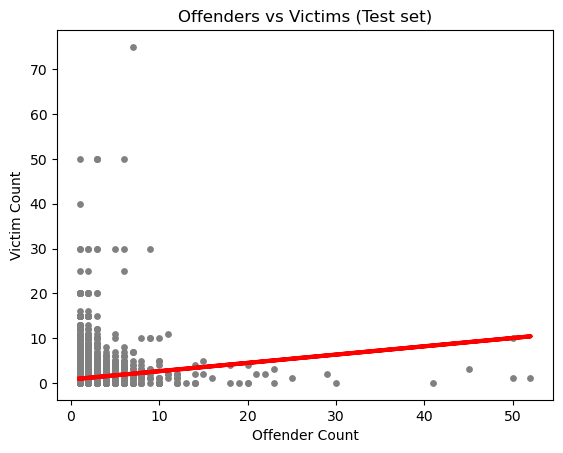

In [46]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Offenders vs Victims (Test set)')
plot_test.xlabel('Offender Count')
plot_test.ylabel('Victim Count')
plot_test.show()

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [49]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18526447]]
Mean squared error:  2.054988887310749
R2 score:  0.01481869407451153


#### Interpretation:
##### The slope has a positive incline meaning the relationship between the two variables is also positive. This aligns with the earlier proposed hypothesis that as offender counts rise, victim counts rise. The MSE is low which means the regression line passes fairly close to the observations making it a good fit. The r2 score is incredibly low which indiactes a poor fit. 

In [51]:
# Predict on the training set
# This is predicting X_train!
y_predicted_train = regression.predict(X_train) 

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18526447]]
Mean squared error:  1.919522943825065
R2 score:  0.019455154101117977


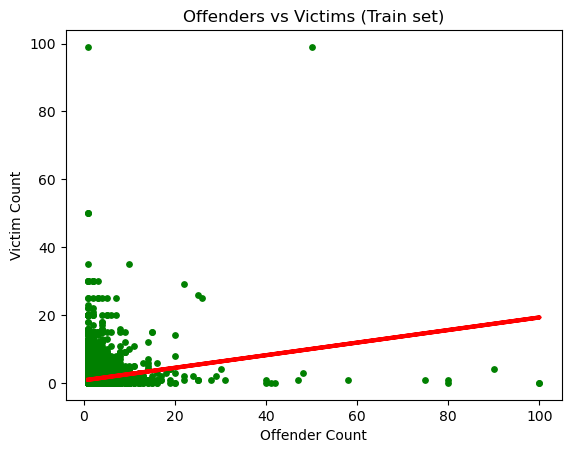

In [54]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Offenders vs Victims (Train set)')
plot_test.xlabel('Offender Count')
plot_test.ylabel('Victim Count')
plot_test.show()

In [56]:
# Create a df comparing the actual and predicted values of y
data_comp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_comp.head(30)

,Actual,Predicted
0,2,0.948959
1,0,0.948959
2,1,0.948959
3,5,0.948959
4,0,0.948959
5,0,0.948959
6,0,0.948959
7,1,1.134223
8,1,0.948959
9,1,0.948959


#### The model outcome for the two sets of data were very similar; graphs, slope, R2 score, and MSE were all similar for both sets. The actual Y values compared to predicted values were good a bit inaccurate. For values of 1 the model was fairly close but values larger than 1 barely had any adjustment and were quite off. I do not believe there to be bias for this model. 

In [58]:
# exporting data 
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'new_hate_crime_wrangled.csv'))